In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [7]:
data.head(30)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
13  0.62976   0.0   8.14     0  0.538  5.949   61.8  4.7075    4  307   
14  0.63796   0.0   8.14     0  0.538  6.096   84.5  4.4619    4  307   
15  0.62739   0.0   8.14     0  0.538  5.834   56.5  4.4986    4  307   
16  1.05393   0.0   8.14     0  0.538  5.935   29.3  4.4986    4  307   
17  0.78420   0.0   8.14     0  0.538  5.990   81.7  4.2579    4  307   
18  0.80271   0.0   8.14     0  0.538  5.456   36.6  3.7965    4  307   
19  0.72580   0.0   8.14     0  0.538  5.727   69.5  3.7965    4  307   
20  1.25179   0.0   8.14     0  0.538  5.570   98.1  3.7979    4  307   
21  0.85204   0.0   8.14     0  0.538  5.965   89.2  4.0123    4  307   
22  1.23247   0.0   8.14     0  0.538  6.142   91.7  3.9769    4  307   
23  0.98843   0.0   8.14     0  0.538  5.813  100.0  4.0952    4  307   
24  0.75026   0.0   8.14     0  0.538  5.924   94.1  4.3996    4  307   
25  0.84054   0.0   8.14     0  0.538  5.599   85.7  4.4546    4  307   
26  0.67191   0.0   8.14     0  0.538  5.813   90.3  4.6820    4  307   
27  0.95577   0.0   8.14     0  0.538  6.047   88.8  4.4534    4  307   
28  0.77299   0.0   8.14     0  0.538  6.495   94.4  4.4547    4  307   
29  1.00245   0.0   8.14     0  0.538  6.674   87.3  4.2390    4  307   

    PTRATIO       B  LSTAT  MEDV  
0      15.3  396.90   4.98  24.0  
1      17.8  396.90   9.14  21.6  
2      17.8  392.83   4.03  34.7  
3      18.7  394.63   2.94  33.4  
4      18.7  396.90   5.33  36.2  
5      18.7  394.12   5.21  28.7  
6      15.2  395.60  12.43  22.9  
7      15.2  396.90  19.15  27.1  
8      15.2  386.63  29.93  16.5  
9      15.2  386.71  17.10  18.9  
10     15.2  392.52  20.45  15.0  
11     15.2  396.90  13.27  18.9  
12     15.2  390.50  15.71  21.7  
13     21.0  396.90   8.26  20.4  
14     21.0  380.02  10.26  18.2  
15     21.0  395.62   8.47  19.9  
16     21.0  386.85   6.58  23.1  
17     21.0  386.75  14.67  17.5  
18     21.0  288.99  11.69  20.2  
19     21.0  390.95  11.28  18.2  
20     21.0  376.57  21.02  13.6  
21     21.0  392.53  13.83  19.6  
22     21.0  396.90  18.72  15.2  
23     21.0  394.54  19.88  14.5  
24     21.0  394.33  16.30  15.6  
25     21.0  303.42  16.51  13.9  
26     21.0  376.88  14.81  16.6  
27     21.0  306.38  17.28  14.8  
28     21.0  387.94  12.80  18.4  
29     21.0  380.23  11.98  21.0

Рассмотрим датасет поближе.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [9]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

В датасете 2 категориальных признака - CHAS и RAD, остальные вещественные. Интересен признак TAX своим высоким относительно медианы средним показателем.

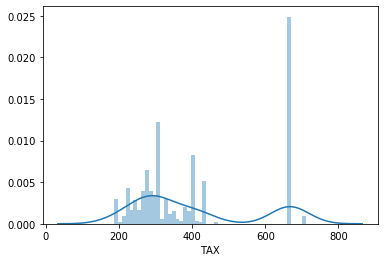

In [10]:
sns.distplot(data['TAX'], bins=50)

Видим большое количество значений в районе 666.

In [16]:
unusual_tax_data = data[ data['TAX'] == 666 ]
unusual_tax_data.shape

(132, 14)

In [17]:
unusual_tax_data.describe()

CRIM     ZN         INDUS        CHAS         NOX          RM  \
count  132.000000  132.0  1.320000e+02  132.000000  132.000000  132.000000   
mean    12.759291    0.0  1.810000e+01    0.060606    0.672417    6.022152   
std     13.041169    0.0  4.636122e-14    0.239515    0.061004    0.718449   
min      2.378570    0.0  1.810000e+01    0.000000    0.532000    3.561000   
25%      5.686307    0.0  1.810000e+01    0.000000    0.614000    5.713000   
50%      9.084990    0.0  1.810000e+01    0.000000    0.693000    6.176000   
75%     14.333700    0.0  1.810000e+01    0.000000    0.713000    6.419000   
max     88.976200    0.0  1.810000e+01    1.000000    0.770000    8.780000   

              AGE         DIS    RAD    TAX       PTRATIO           B  \
count  132.000000  132.000000  132.0  132.0  1.320000e+02  132.000000   
mean    89.805303    2.061254   24.0  666.0  2.020000e+01  288.089167   
std     12.625809    0.617901    0.0    0.0  1.426499e-14  145.860431   
min     40.300000    1.129600   24.0  666.0  2.020000e+01    0.320000   
25%     85.925000    1.589250   24.0  666.0  2.020000e+01  167.375000   
50%     94.400000    1.943400   24.0  666.0  2.020000e+01  373.740000   
75%     98.825000    2.431300   24.0  666.0  2.020000e+01  395.292500   
max    100.000000    4.098300   24.0  666.0  2.020000e+01  396.900000   

            LSTAT        MEDV  
count  132.000000  132.000000  
mean    18.600606   16.403788  
std      6.905296    8.539745  
min      2.960000    5.000000  
25%     14.175000   11.225000  
50%     17.910000   14.400000  
75%     23.045000   19.900000  
max     37.970000   50.000000

Наблюдается аномалия с признаком TAX и к нему INDUS, RAD и ZN. Перечень этих признаков для TAX 666 сильно отличается от общей выборки.

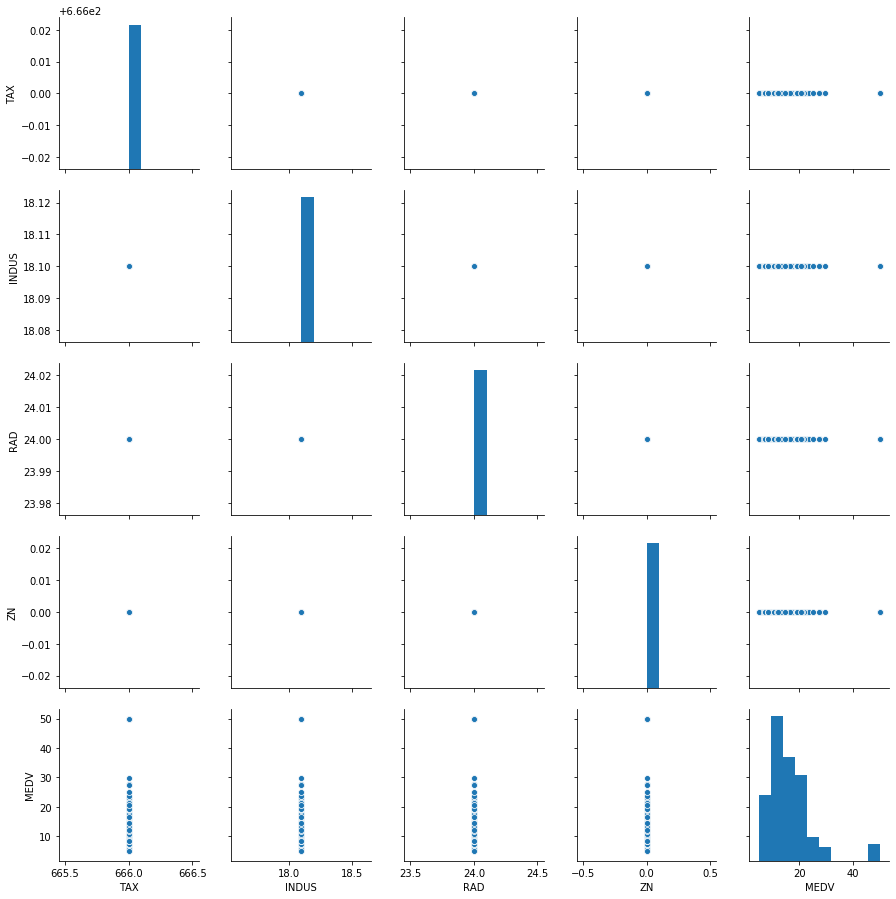

In [18]:
unusual_tax_data = unusual_tax_data[['TAX','INDUS', 'RAD', 'ZN', 'MEDV']]
sns.pairplot(unusual_tax_data)

In [19]:
132/506

0.2608695652173913

Очистим от непонятных данных и посмотрим, как выглядит pairplot

In [20]:
filtered_data = data[ data['TAX'] != 666 ]
filtered_data.shape

(374, 14)

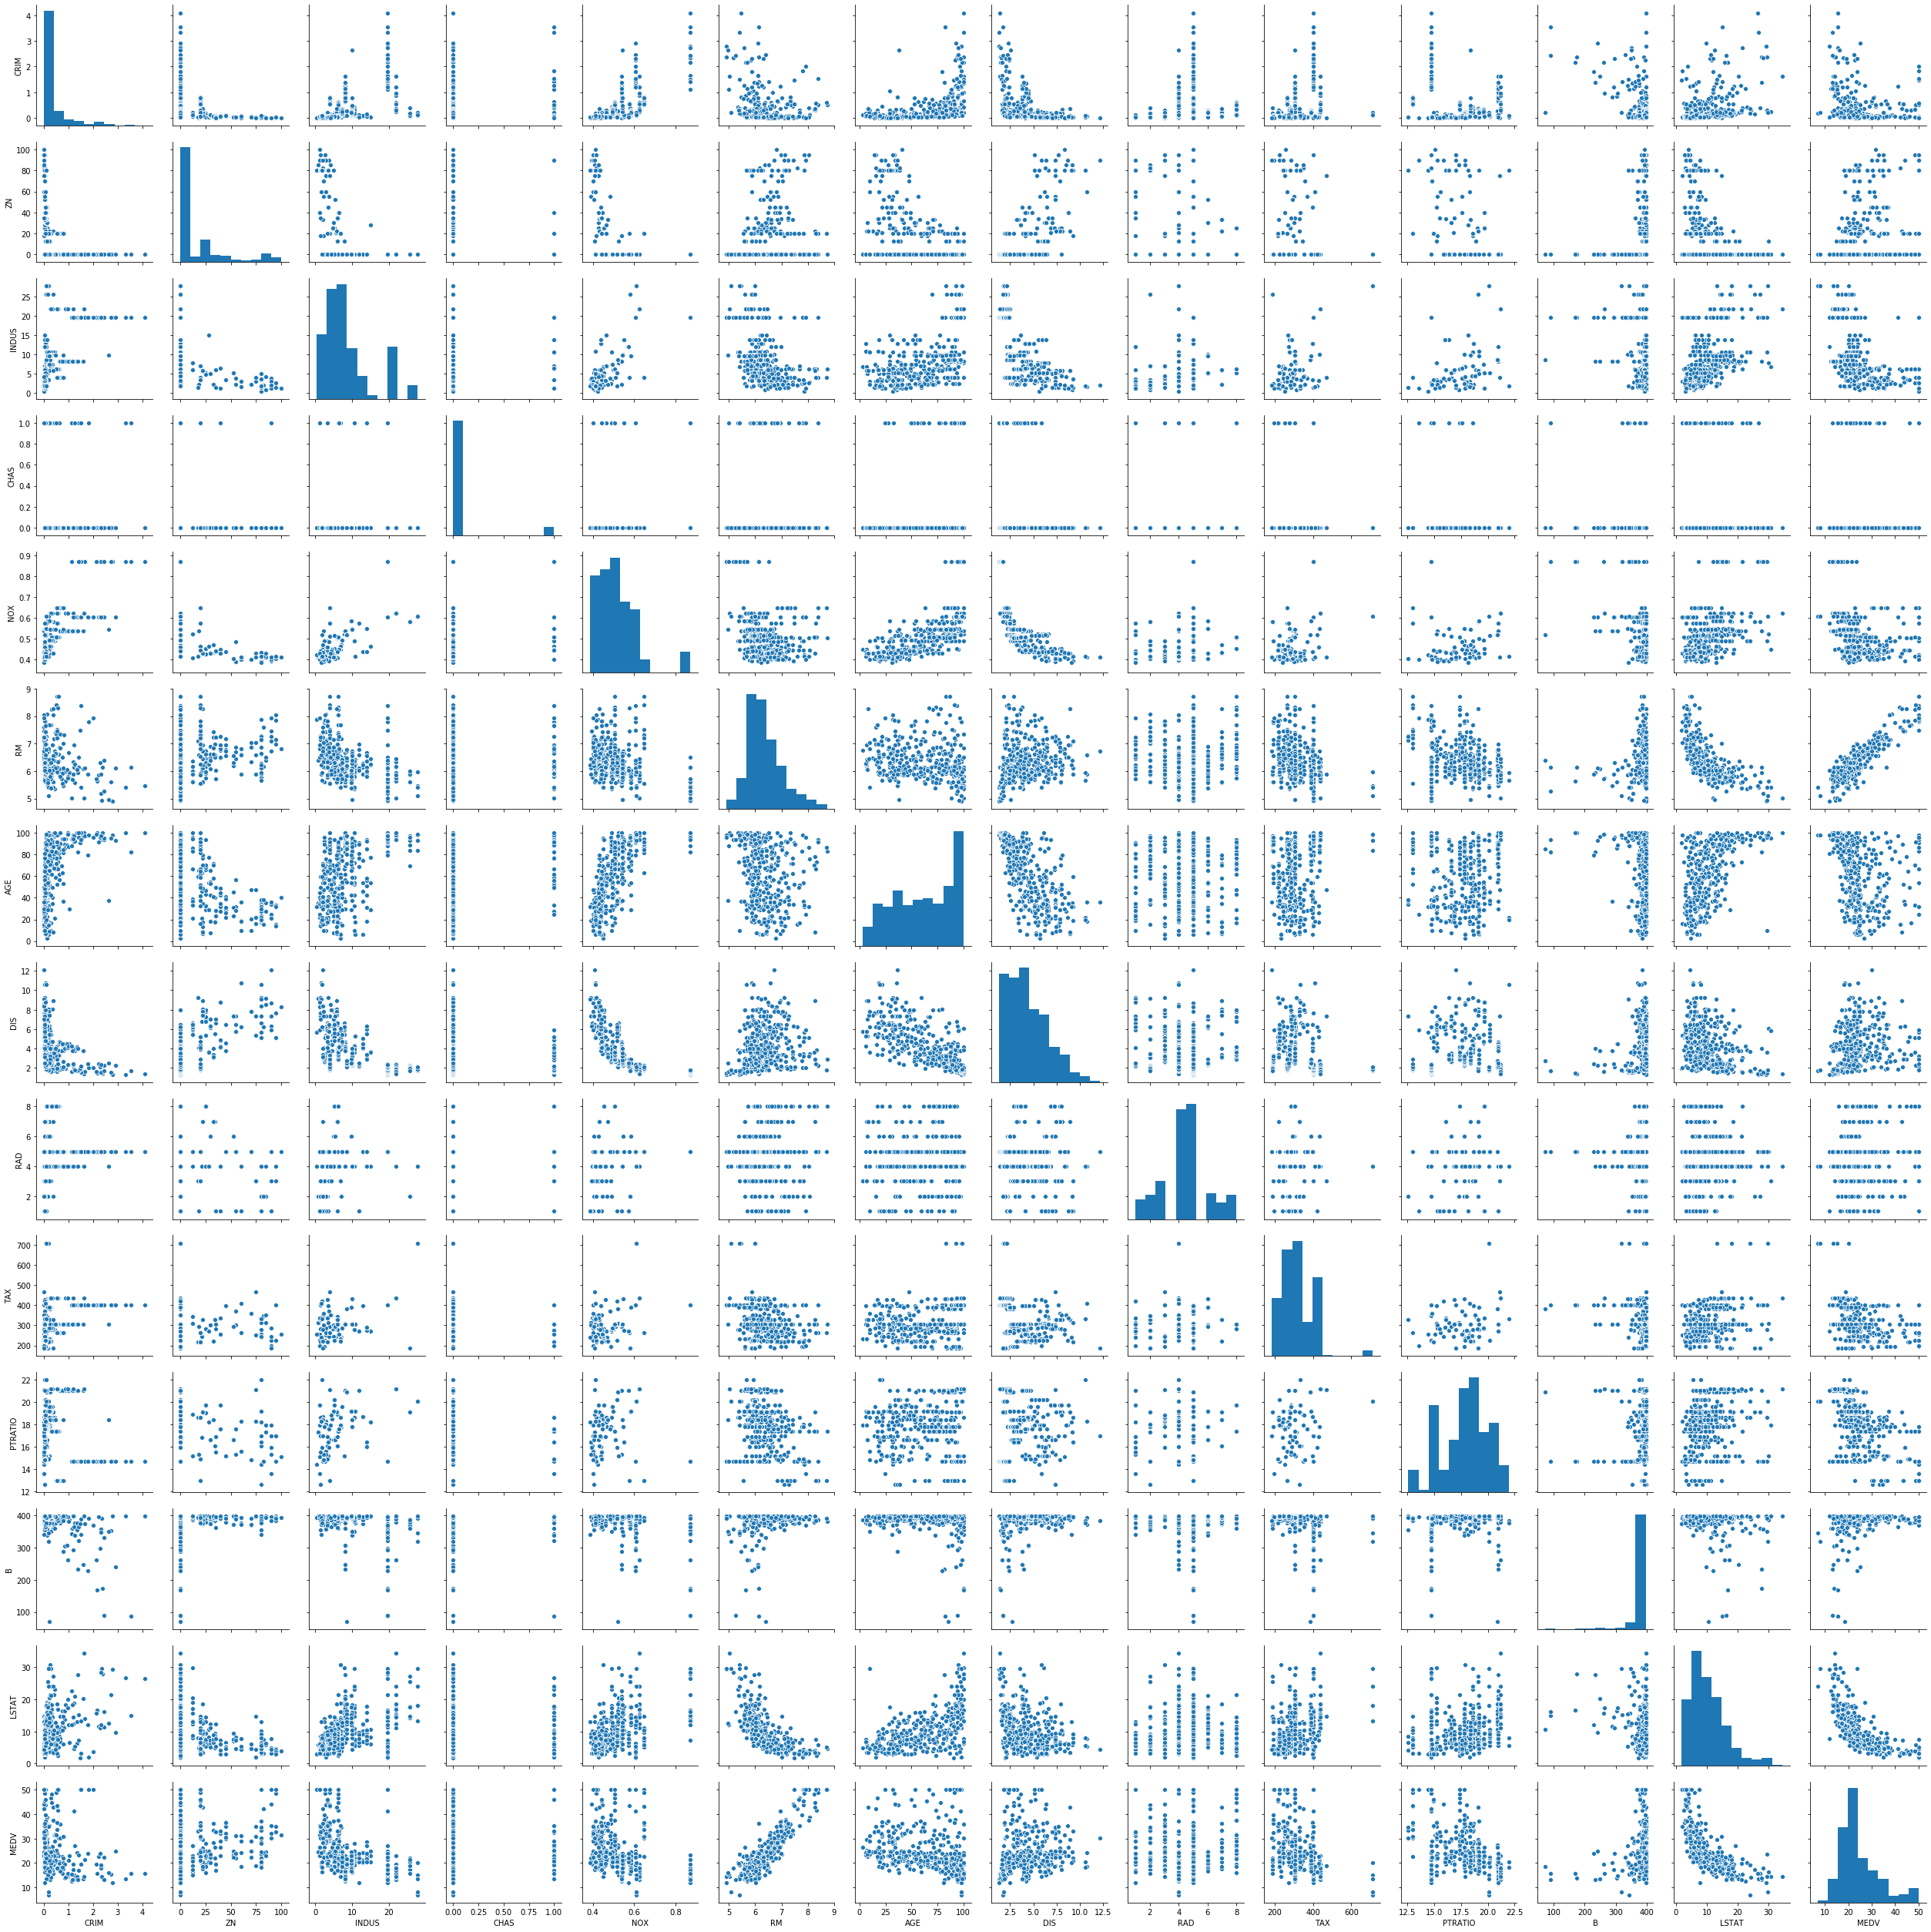

In [21]:
sns.pairplot(filtered_data)

Есть еще некоторые подозрительные выбросы, которые стоит проверить. Меня смущает выброс в признаке NOX, в признаке INDUS и опять же TAX.

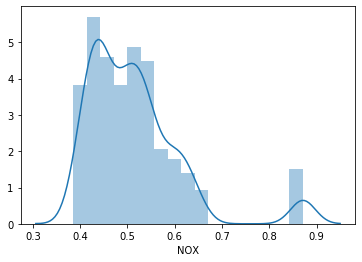

In [22]:
sns.distplot(filtered_data['NOX'])

In [23]:
filtered_data[ filtered_data['NOX'] == 0.871 ].describe()

CRIM    ZN         INDUS       CHAS           NOX         RM  \
count  16.000000  16.0  1.600000e+01  16.000000  1.600000e+01  16.000000   
mean    2.338463   0.0  1.958000e+01   0.250000  8.710000e-01   5.596938   
std     0.826967   0.0  7.338454e-15   0.447214  3.439900e-16   0.492477   
min     1.126580   0.0  1.958000e+01   0.000000  8.710000e-01   4.903000   
25%     1.616530   0.0  1.958000e+01   0.000000  8.710000e-01   5.250500   
50%     2.349805   0.0  1.958000e+01   0.000000  8.710000e-01   5.532500   
75%     2.745413   0.0  1.958000e+01   0.250000  8.710000e-01   6.123750   
max     4.097400   0.0  1.958000e+01   1.000000  8.710000e-01   6.510000   

              AGE        DIS   RAD    TAX       PTRATIO           B  \
count   16.000000  16.000000  16.0   16.0  1.600000e+01   16.000000   
mean    96.162500   1.560706   5.0  403.0  1.470000e+01  300.939375   
std      4.902091   0.144448   0.0    0.0  3.669227e-15  109.632700   
min     82.600000   1.321600   5.0  403.0  1.470000e+01   88.010000   
25%     94.675000   1.450375   5.0  403.0  1.470000e+01  239.690000   
50%     97.550000   1.560600   5.0  403.0  1.470000e+01  347.565000   
75%    100.000000   1.651500   5.0  403.0  1.470000e+01  377.527500   
max    100.000000   1.765900   5.0  403.0  1.470000e+01  396.900000   

           LSTAT       MEDV  
count  16.000000  16.000000  
mean   19.702500  16.425000  
std     7.253222   3.165965  
min     7.390000  11.800000  
25%    14.790000  14.400000  
50%    16.395000  15.600000  
75%    27.065000  18.200000  
max    29.530000  23.300000

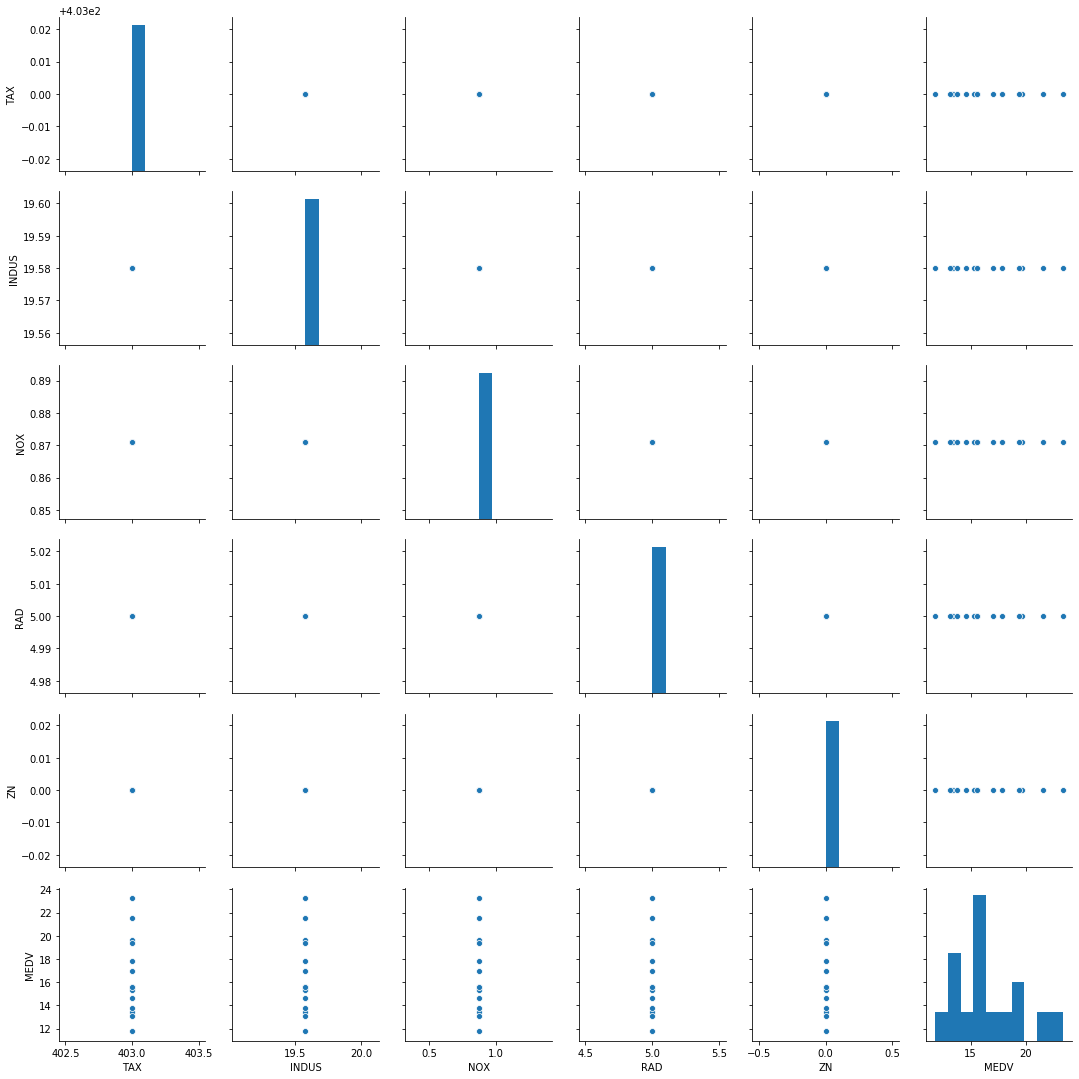

In [24]:
unusual_nox_data = data[ data['NOX'] == 0.871 ]
unusual_nox_data = unusual_nox_data[['TAX','INDUS', 'NOX', 'RAD', 'ZN', 'MEDV']]
sns.pairplot(unusual_nox_data)

Пробуем вычеркнуть еще 16 наблюдений.

In [25]:
filtered_data = data[ (data['TAX'] != 666) & (data['NOX'] != 0.871) ]
filtered_data.shape

(358, 14)

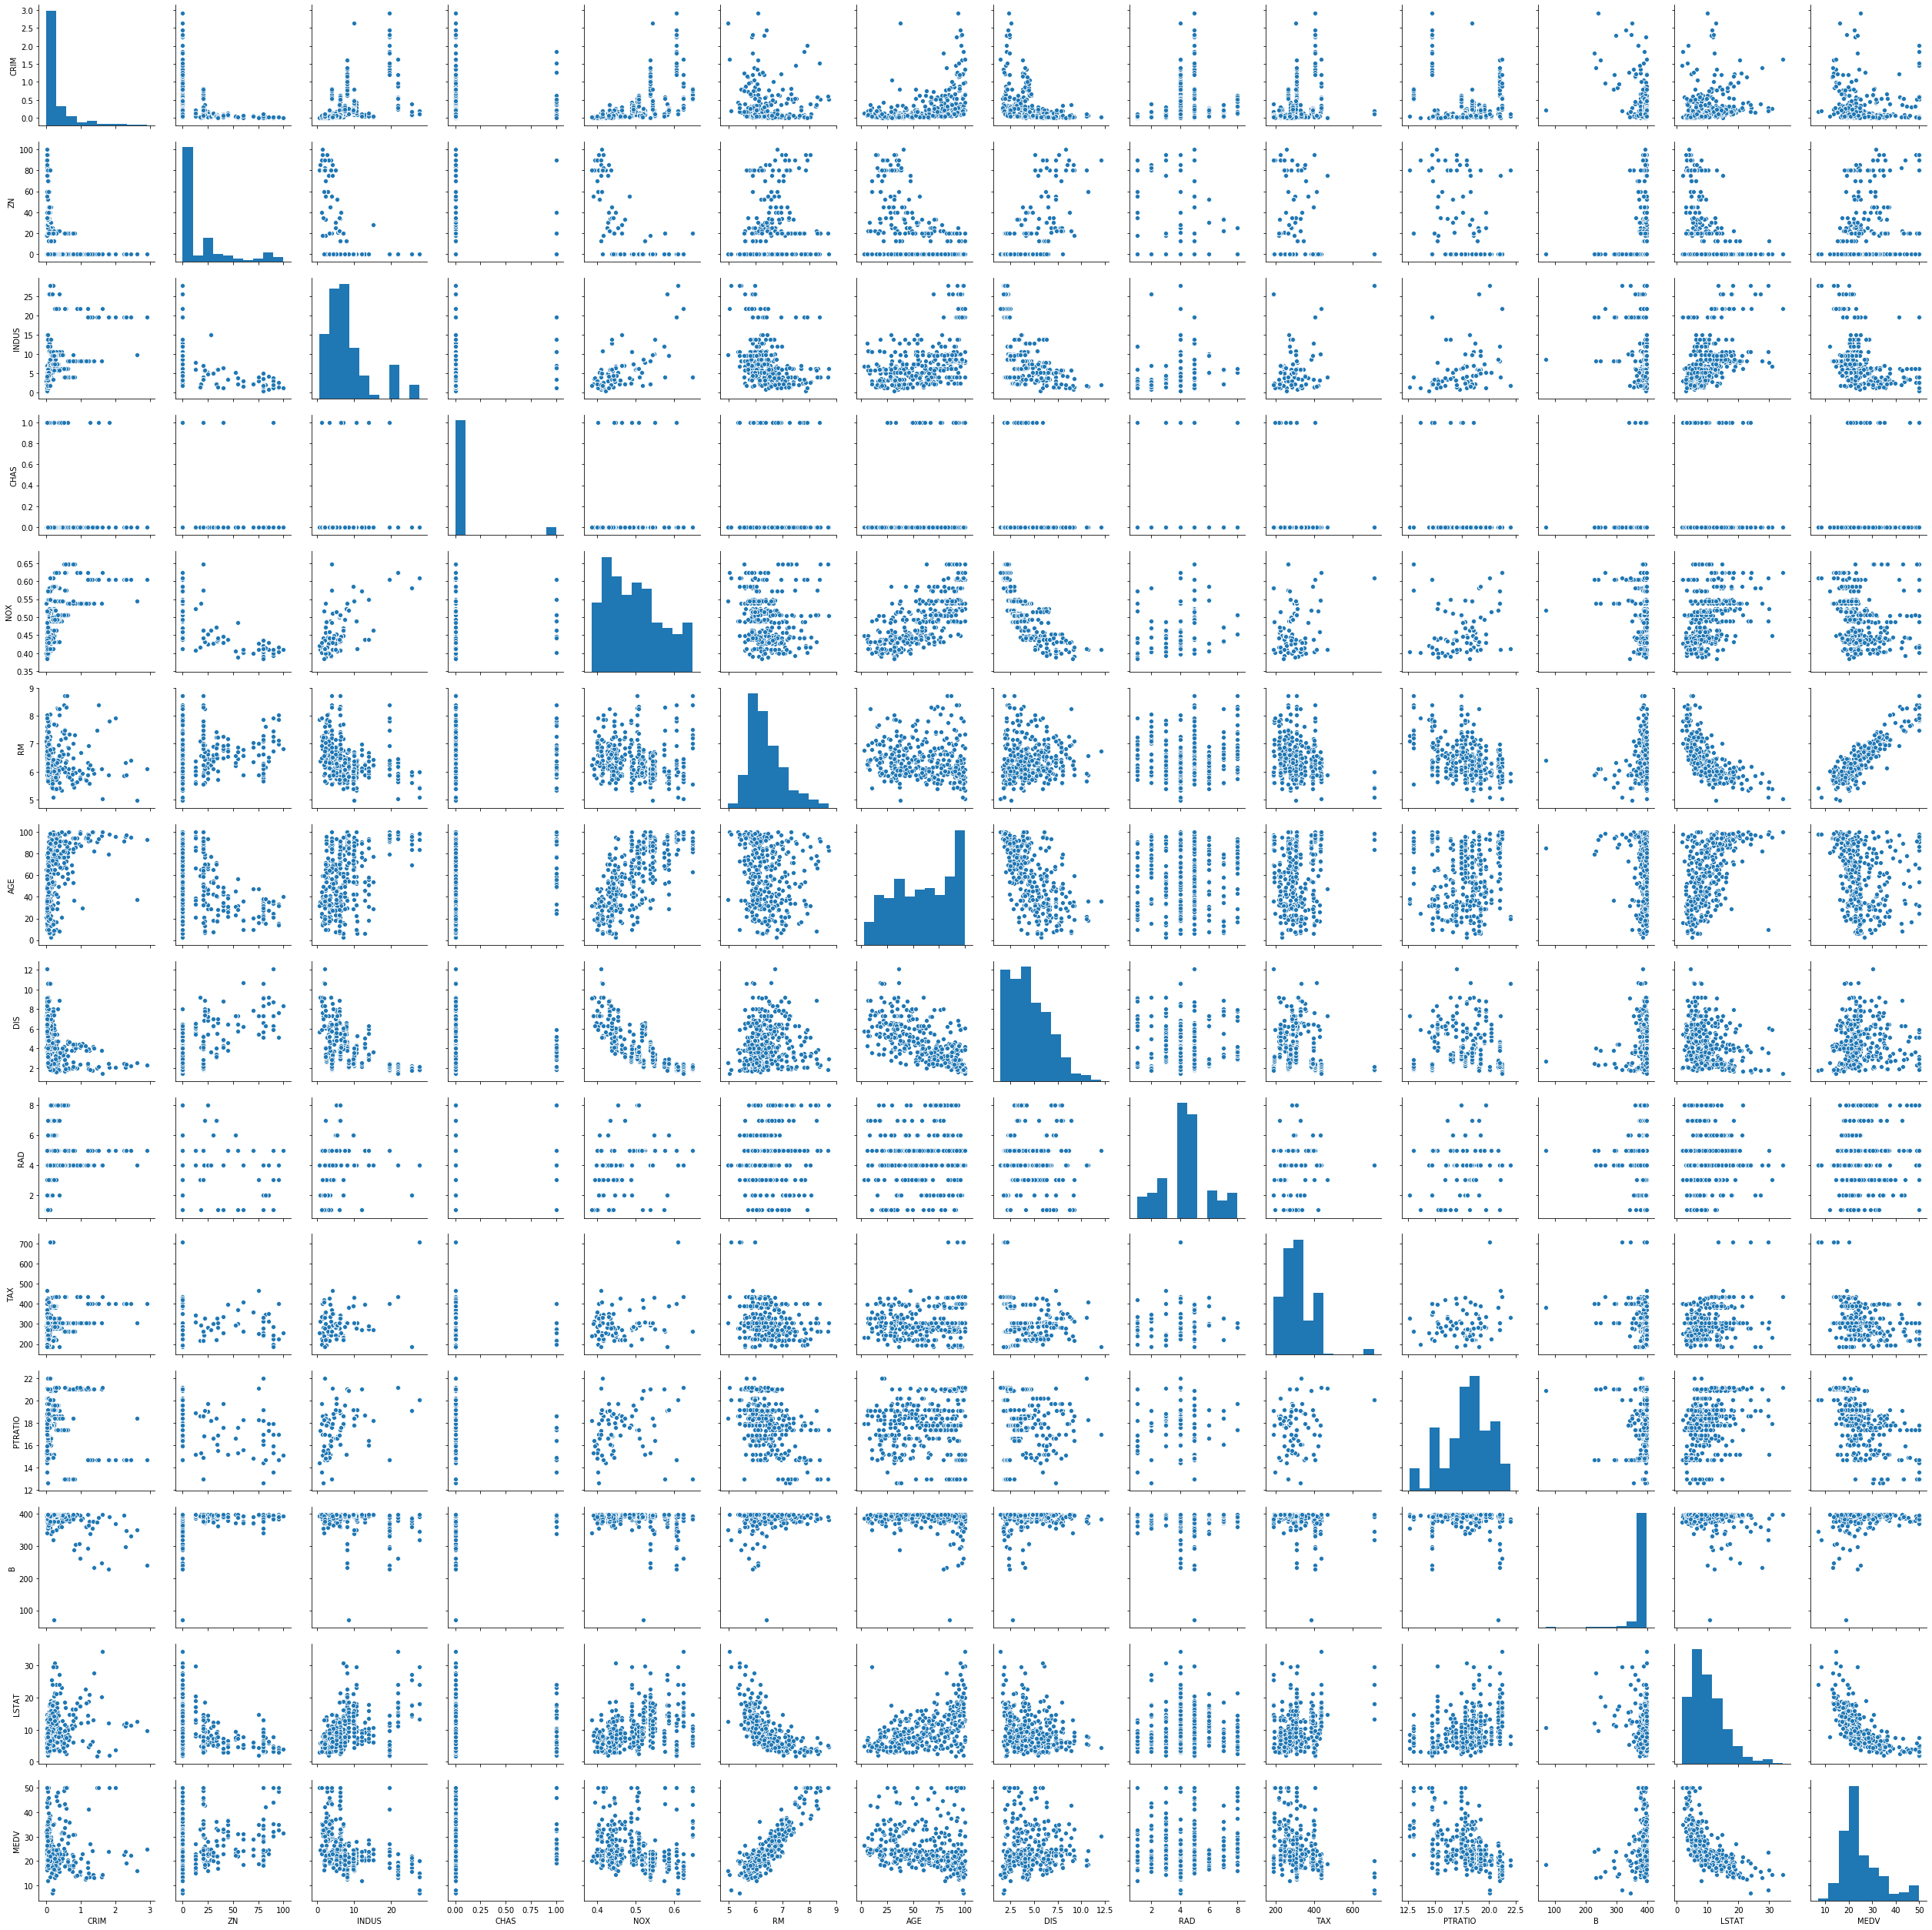

In [26]:
sns.pairplot(filtered_data)

In [ ]:
Почистим еще по признаку TAX.

In [27]:
filtered_data = data[ (data['TAX'] < 666) & (data['NOX'] != 0.871) ]
filtered_data.shape

(353, 14)

Несколько признаков выбиваются из общей картины. Возможно, что в выборке представлены какие-то две группы, попробуем их найти.

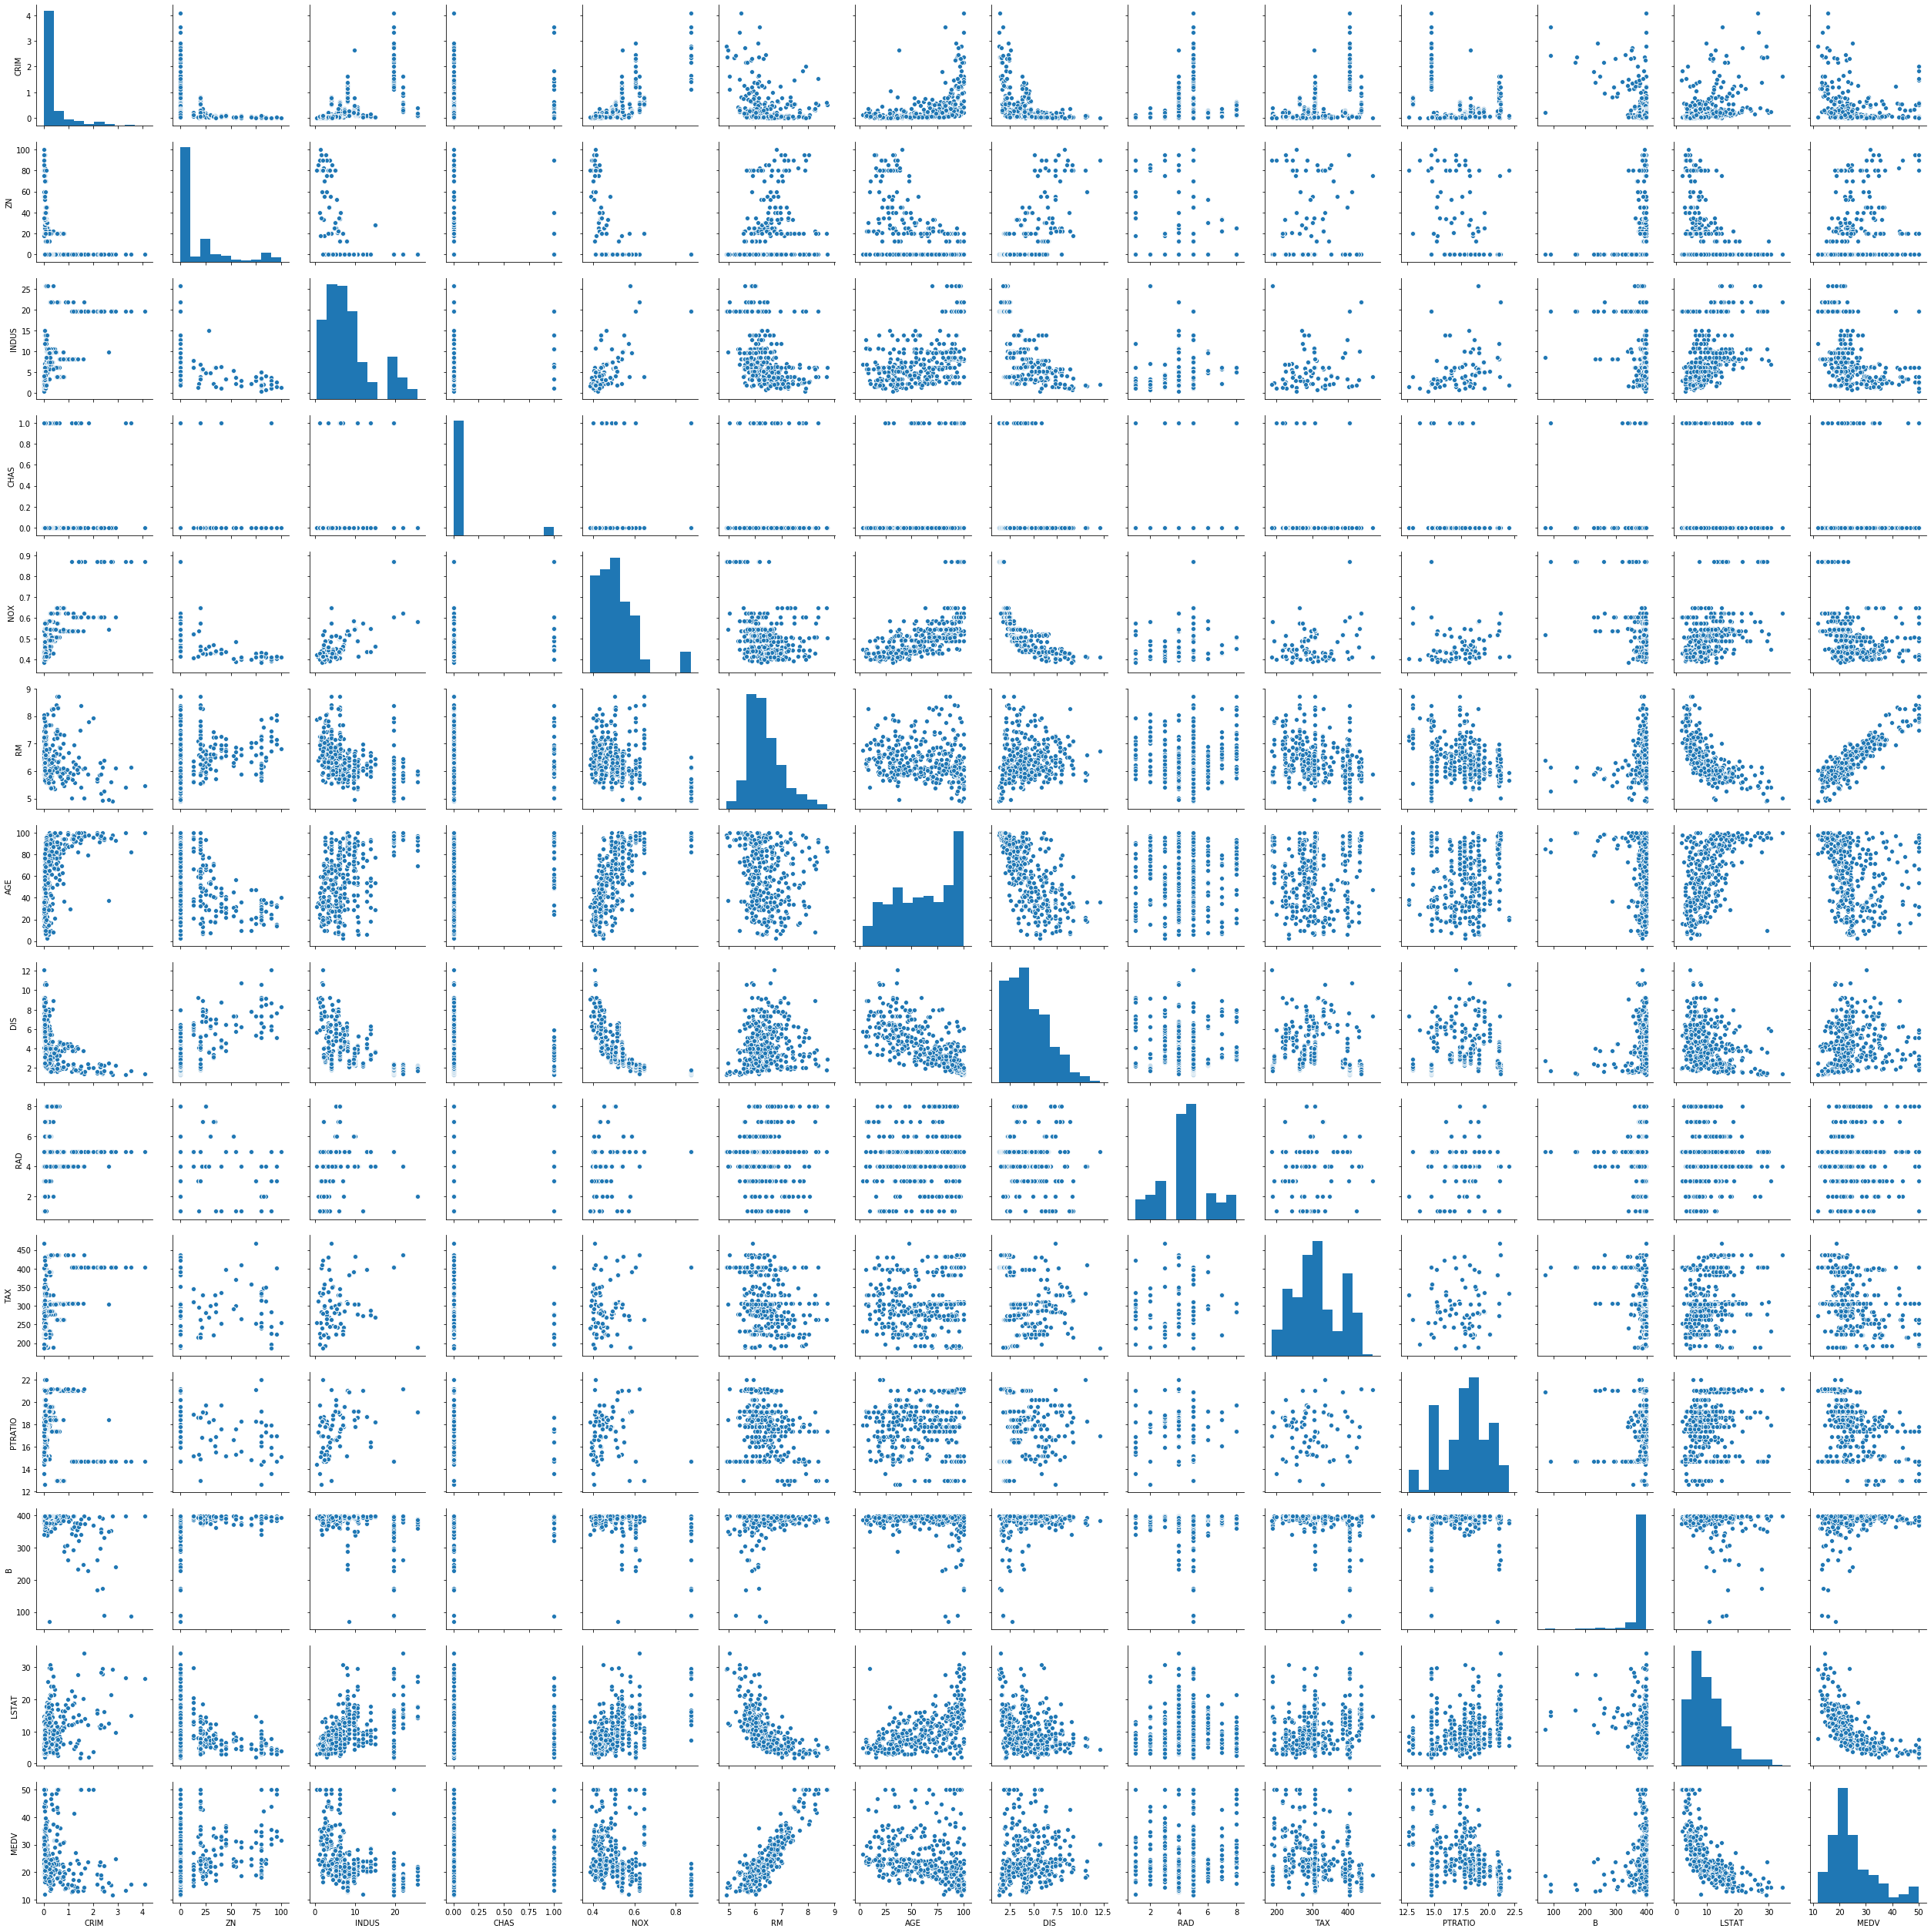

In [29]:
group_1 = data[ data['TAX'] < 600 ]
group_2 = data[ data['TAX'] >= 600 ]
sns.pairplot(group_1)

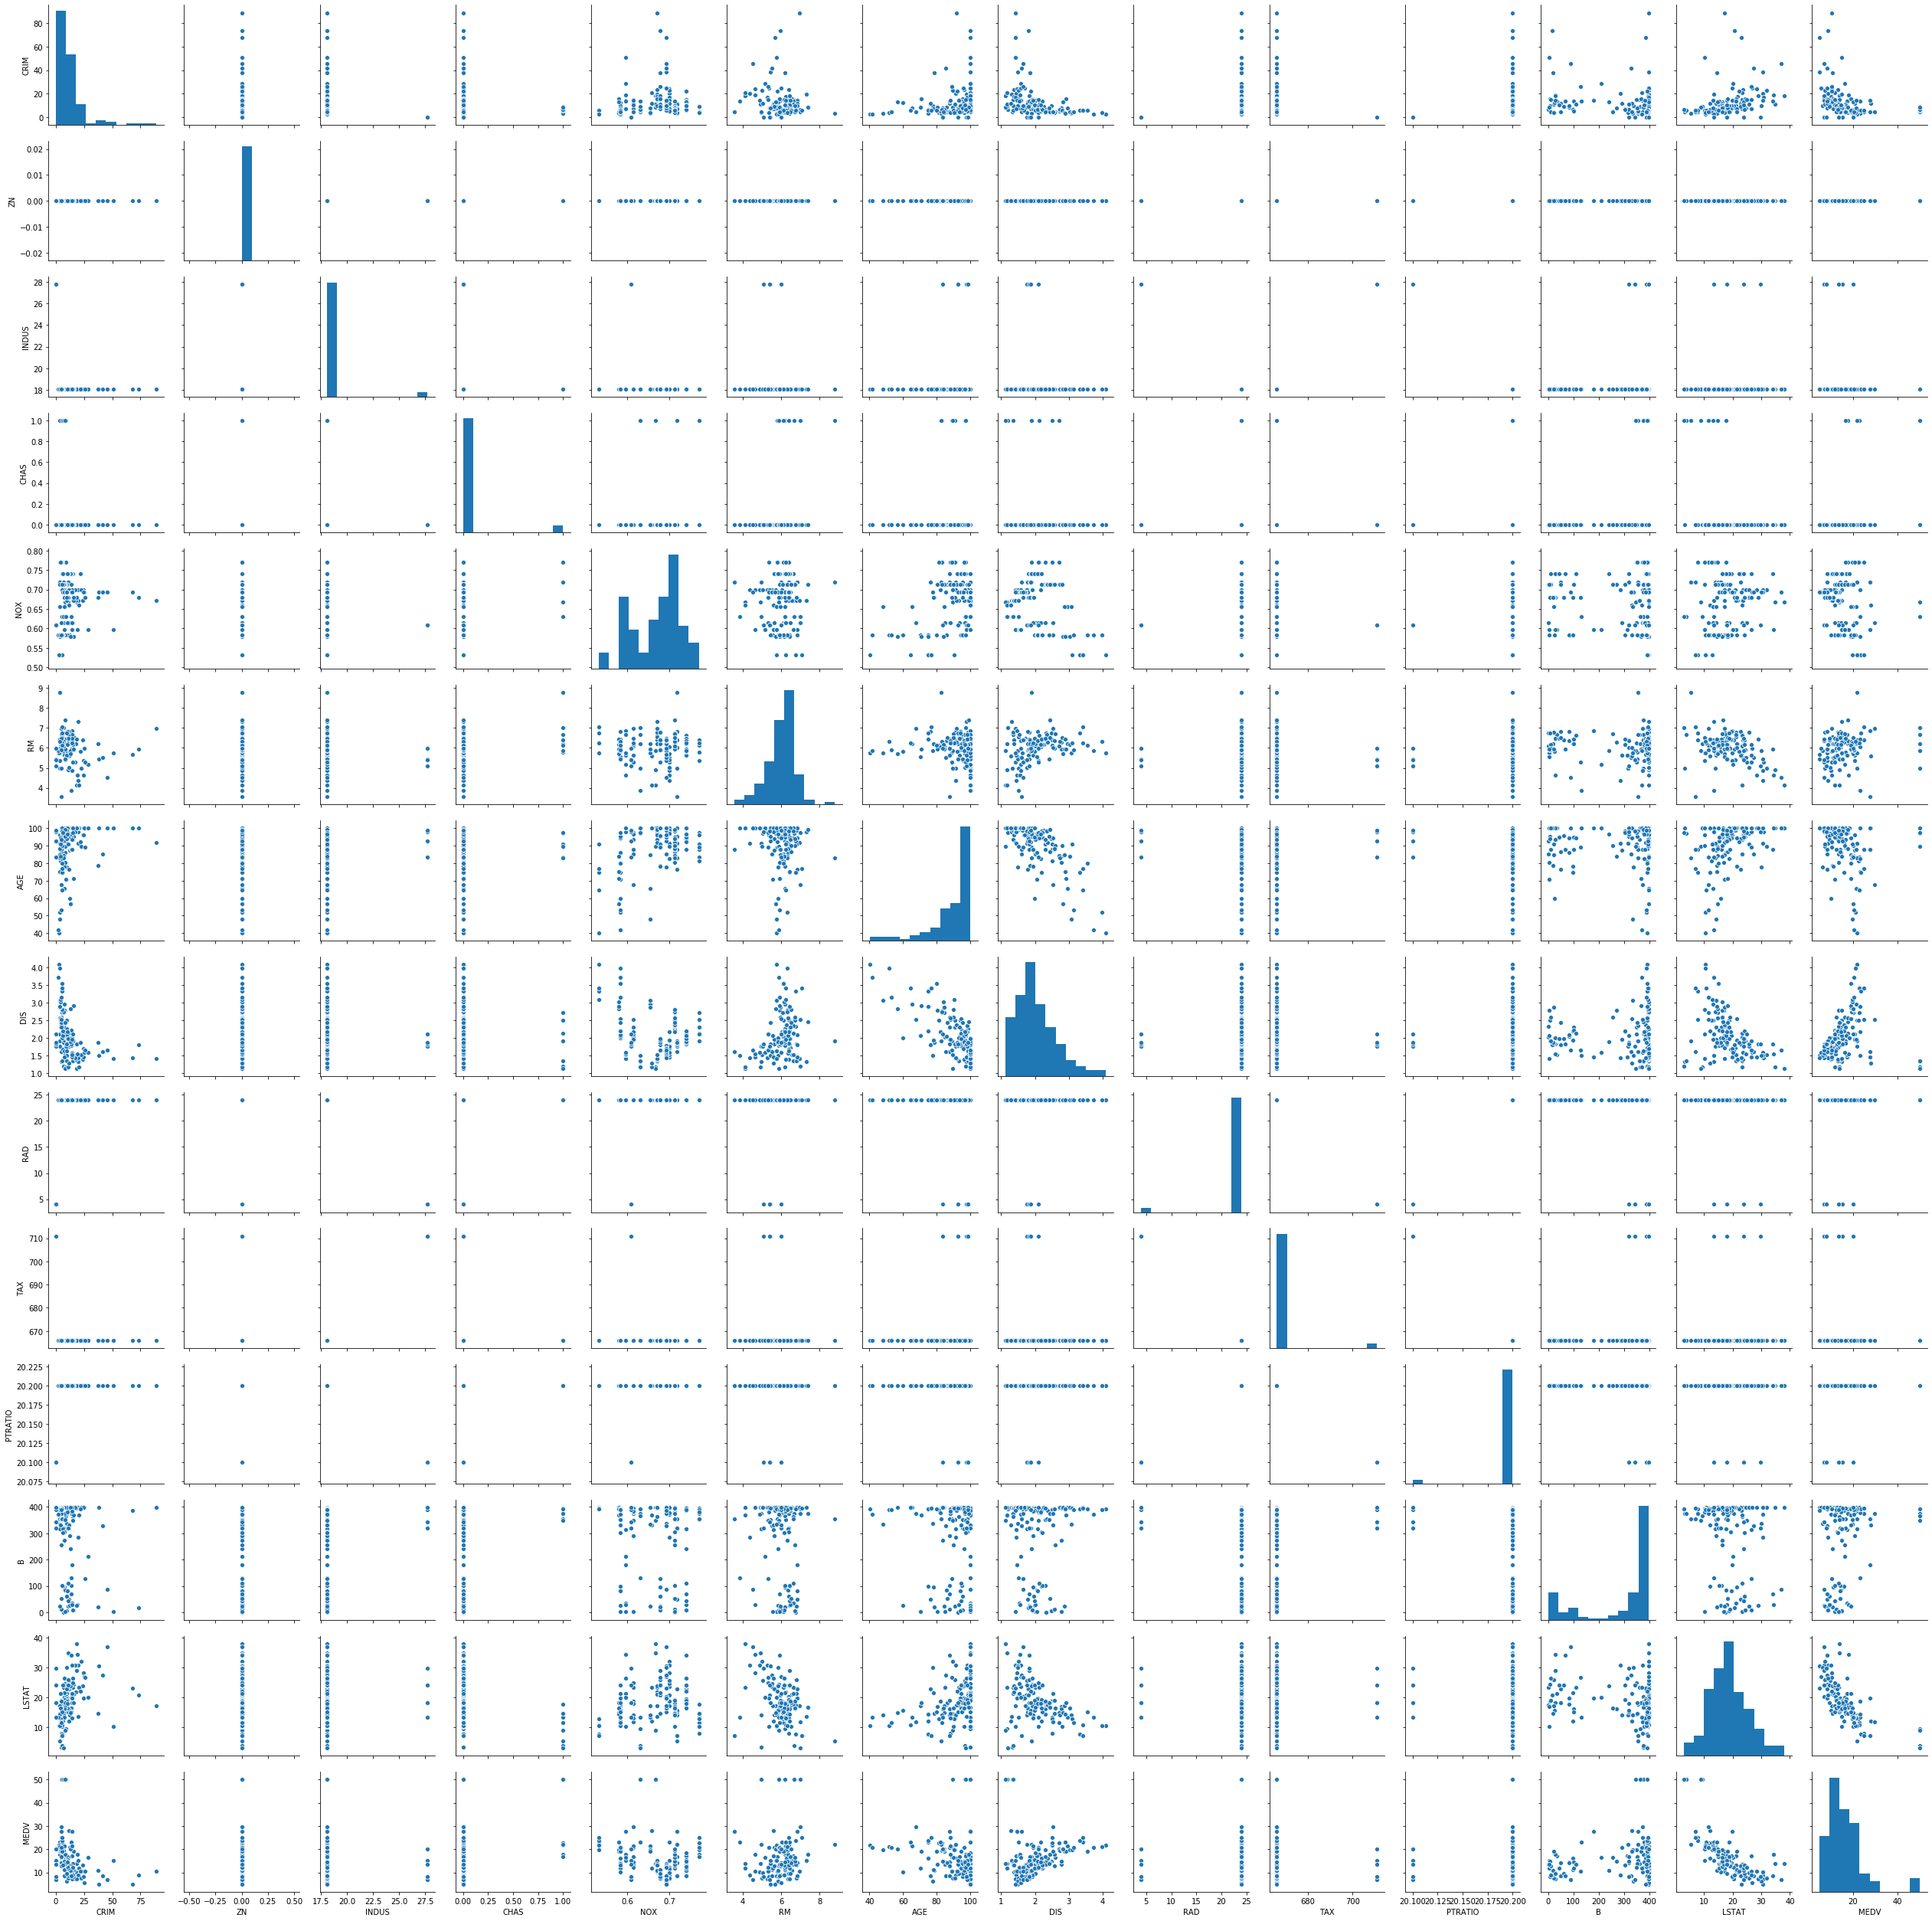

In [30]:
sns.pairplot(group_2)

В целом группы отличаются, особенно в найденных выше показателях. Но если посмотреть на остальные показатели, они в целом хорошо могут хорошо коррелировать с искомым MEDV. В ходе анализа посмотрим результативность в целом и каждой группы в отдельности.

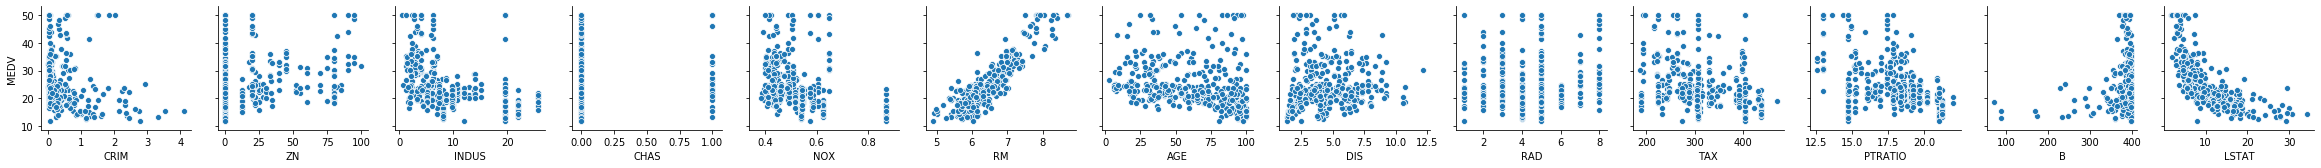

In [31]:
sns.pairplot(group_1, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV')

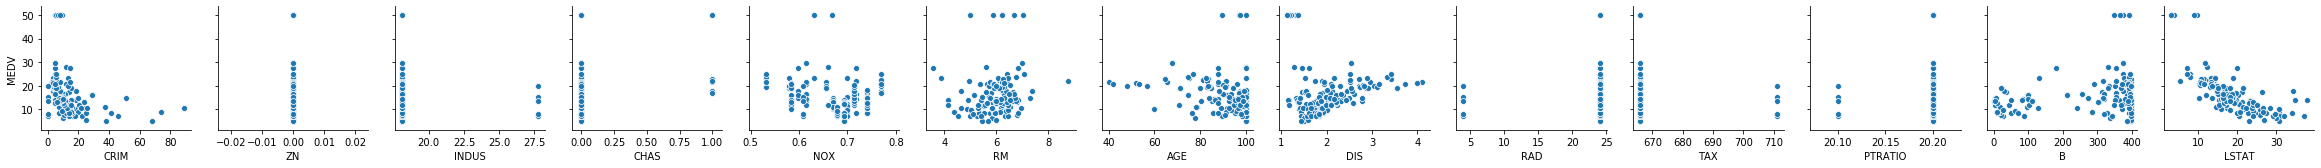

In [32]:
sns.pairplot(group_2, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV')

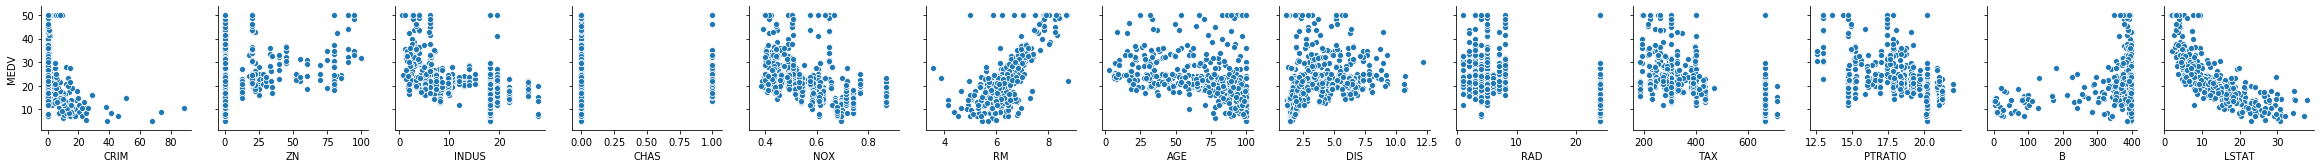

In [33]:
sns.pairplot(data, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV')

Уже сейчас мы можем сказать, что показтель MEDV можно определить через два признака - RM и LSTAT. Но RM описывает MEDV через уравнение прямой, в то время как LSTAT описывает MEDV нелинейно.по-разном

In [36]:
X = data[['RM','LSTAT']]
y = data[['MEDV']]
def get_linear_score(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.2,
        random_state = 15
    )

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    return reg.score(X_test, y_test)
get_linear_score(X, y)

0.6412404901688984

Точность линейной регрессии от двух признаков составила 0.64. Проверим еще на очищенной группе.

In [37]:
X = group_1[['RM','LSTAT']]
y = group_1[['MEDV']]
get_linear_score(X, y)

0.7520243834666911

Очищенная от выбросов группа показывает +10% точности. Попробуем добавить остальные признаки и посмотреть на результат.

In [39]:
X = group_1[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = group_1[['MEDV']]
get_linear_score(X, y)

0.8396521446519251

Для сравнения возьмем полный датасет и вторую группу

In [40]:
X = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = data[['MEDV']]
get_linear_score(X, y)

0.6920749038652152

In [41]:
X = group_2[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = group_2[['MEDV']]
get_linear_score(X, y)

0.6990984930302995

Модель предсказывает более точные результаты на очищенных данных в первой группе. Попробуем теперь полином второй степени.

In [42]:
X = group_1[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = group_1[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 15
)
poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.7650410437473124

Точность упала. Попробуем убрать несколько признаков.

In [43]:
X = group_1[['RM', 'LSTAT']]
y = group_1[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 15
)
poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.837863503287235

Итоговый результат оказался аналогичным. Можно поиграться с категориальными признаками, возможно они смогут дать большую точность.